# Phân tích tập dữ liệu Pima Indians Diabetes

Tập dữ liệu này chứa thông tin về bệnh nhân nữ thuộc bộ tộc Pima Indians, được sử dụng để dự đoán liệu một bệnh nhân có mắc bệnh tiểu đường hay không dựa trên các yếu tố nguy cơ.


## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Tập dữ liệu bao gồm thông tin về bệnh nhân nữ thuộc bộ tộc Pima Indians (ít nhất 21 tuổi).
    + Mục tiêu là phân loại xem bệnh nhân có bị tiểu đường hay không dựa trên 8 đặc điểm y tế.
    + Chẩn đoán tiểu đường dựa trên tiêu chí của WHO (2 giờ sau khi đo glucose huyết tương ít nhất 200 mg/dl).
+ **Dữ liệu vào**:
    + Pregnancies: Số lần mang thai
    + Glucose: Nồng độ glucose huyết tương (2 giờ trong nghiệm pháp dung nạp glucose đường uống)
    + BloodPressure: Huyết áp tâm trương (mm Hg)
    + SkinThickness: Độ dày nếp gấp da vùng cơ tam đầu (mm)
    + Insulin: Insulin huyết thanh sau 2 giờ (mu U/ml)
    + BMI: Chỉ số khối cơ thể (cân nặng tính bằng kg/(chiều cao tính bằng m)^2)
    + DiabetesPedigreeFunction: Chức năng phả hệ đái tháo đường (chỉ số di truyền về bệnh tiểu đường)
    + Age: Tuổi (năm)
    + Outcome: Biến phân loại (0: không mắc bệnh tiểu đường, 1: mắc bệnh tiểu đường)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)


In [1]:
# Khai báo thư viện cần thiết
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')


### 2.2. Nạp dữ liệu (Load Dataset)


In [2]:
# Nạp dữ liệu
data_path = 'pima-indians-diabetes.csv'
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(data_path, names=column_names, skiprows=1)

# Hiển thị các dòng đầu của dữ liệu
print("Dữ liệu đầu vào:")
df.head()


Dữ liệu đầu vào:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)


In [3]:
# Thông tin cơ bản về dữ liệu
print(f'Shape của dữ liệu: {df.shape}')
print('\nKiểu dữ liệu:')
print(df.dtypes)
print('\nThông tin chi tiết về dữ liệu:')
df.info()


Shape của dữ liệu: (767, 9)

Kiểu dữ liệu:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Thông tin chi tiết về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null

In [4]:
# Thống kê mô tả của dữ liệu
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
Glucose,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
BloodPressure,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
SkinThickness,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
Insulin,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
BMI,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
DiabetesPedigreeFunction,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
Age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
Outcome,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


Phân bố của biến đầu ra:
Outcome
0    500
1    267
Name: count, dtype: int64
Tỷ lệ dương tính: 34.81%


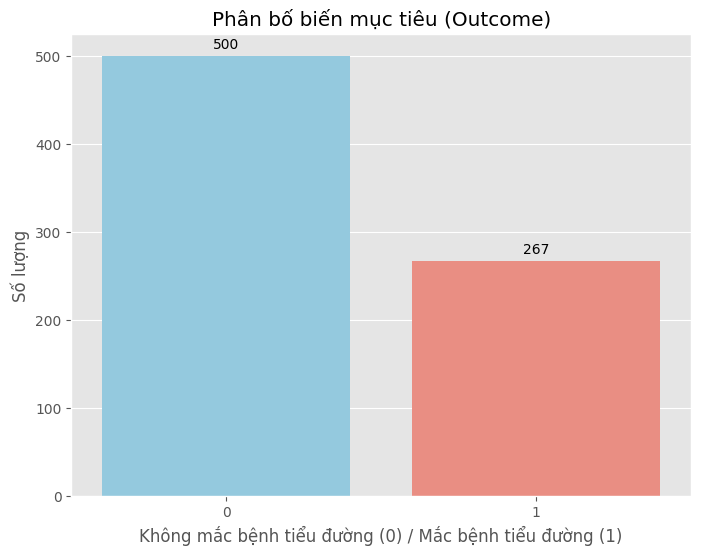

In [5]:
# Phân bố của biến đầu ra (Outcome)
outcome_counts = df['Outcome'].value_counts()
print("Phân bố của biến đầu ra:")
print(outcome_counts)
print(f"Tỷ lệ dương tính: {outcome_counts[1]/len(df):.2%}")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Outcome', data=df, palette=['skyblue', 'salmon'])
plt.title('Phân bố biến mục tiêu (Outcome)')
plt.xlabel('Không mắc bệnh tiểu đường (0) / Mắc bệnh tiểu đường (1)')
plt.ylabel('Số lượng')

# Thêm nhãn số lượng trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{int(height)}', 
            ha="center", va="bottom")
    
plt.show()


In [6]:
# Kiểm tra giá trị null hoặc NaN
print("Kiểm tra giá trị null:")
print(df.isnull().sum())

print("\nKiểm tra giá trị bằng 0 trong các cột không nên có giá trị 0:")
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    zero_percent = zero_count / len(df) * 100
    print(f"{col}: {zero_count} giá trị 0 ({zero_percent:.2f}%)")


Kiểm tra giá trị null:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Kiểm tra giá trị bằng 0 trong các cột không nên có giá trị 0:
Glucose: 5 giá trị 0 (0.65%)
BloodPressure: 35 giá trị 0 (4.56%)
SkinThickness: 227 giá trị 0 (29.60%)
Insulin: 373 giá trị 0 (48.63%)
BMI: 11 giá trị 0 (1.43%)


### 3.2. Hiển thị dữ liệu (Visualize Data)


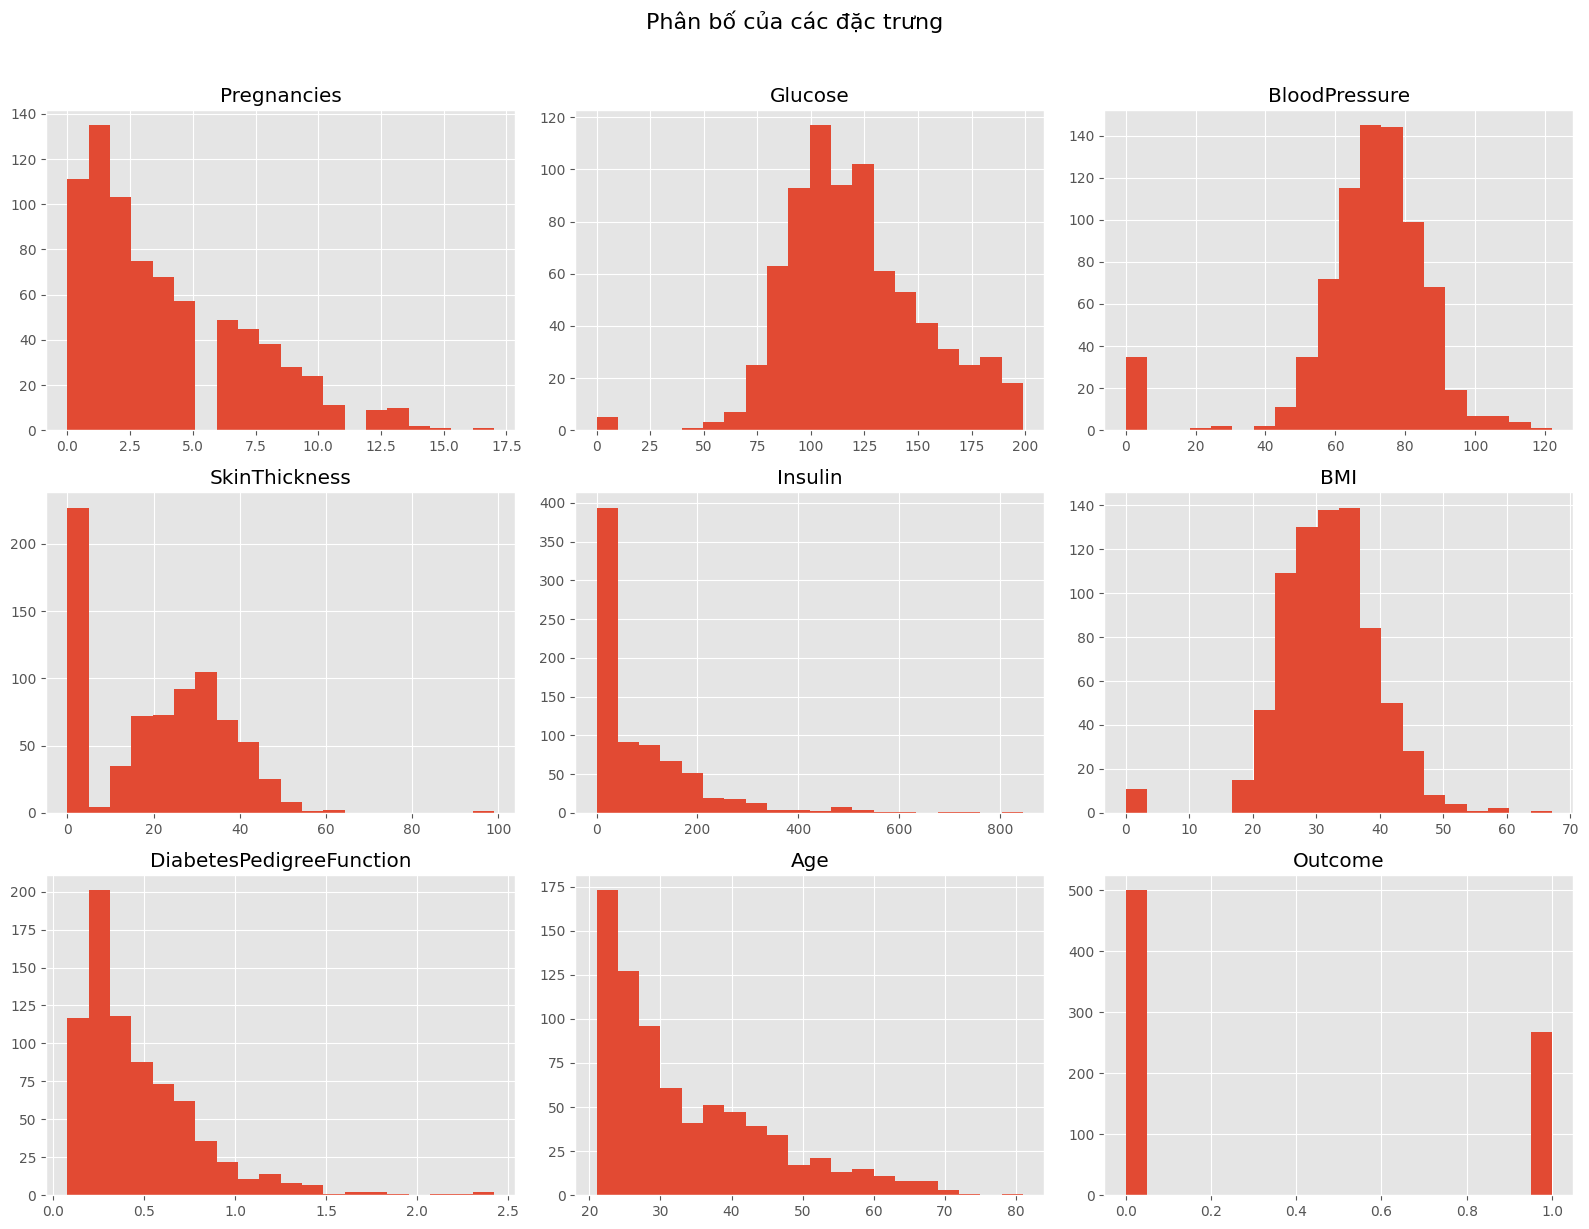

In [7]:
# Biểu đồ histogram cho tất cả các đặc trưng
df.hist(figsize=(16, 12), bins=20)
plt.suptitle('Phân bố của các đặc trưng', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


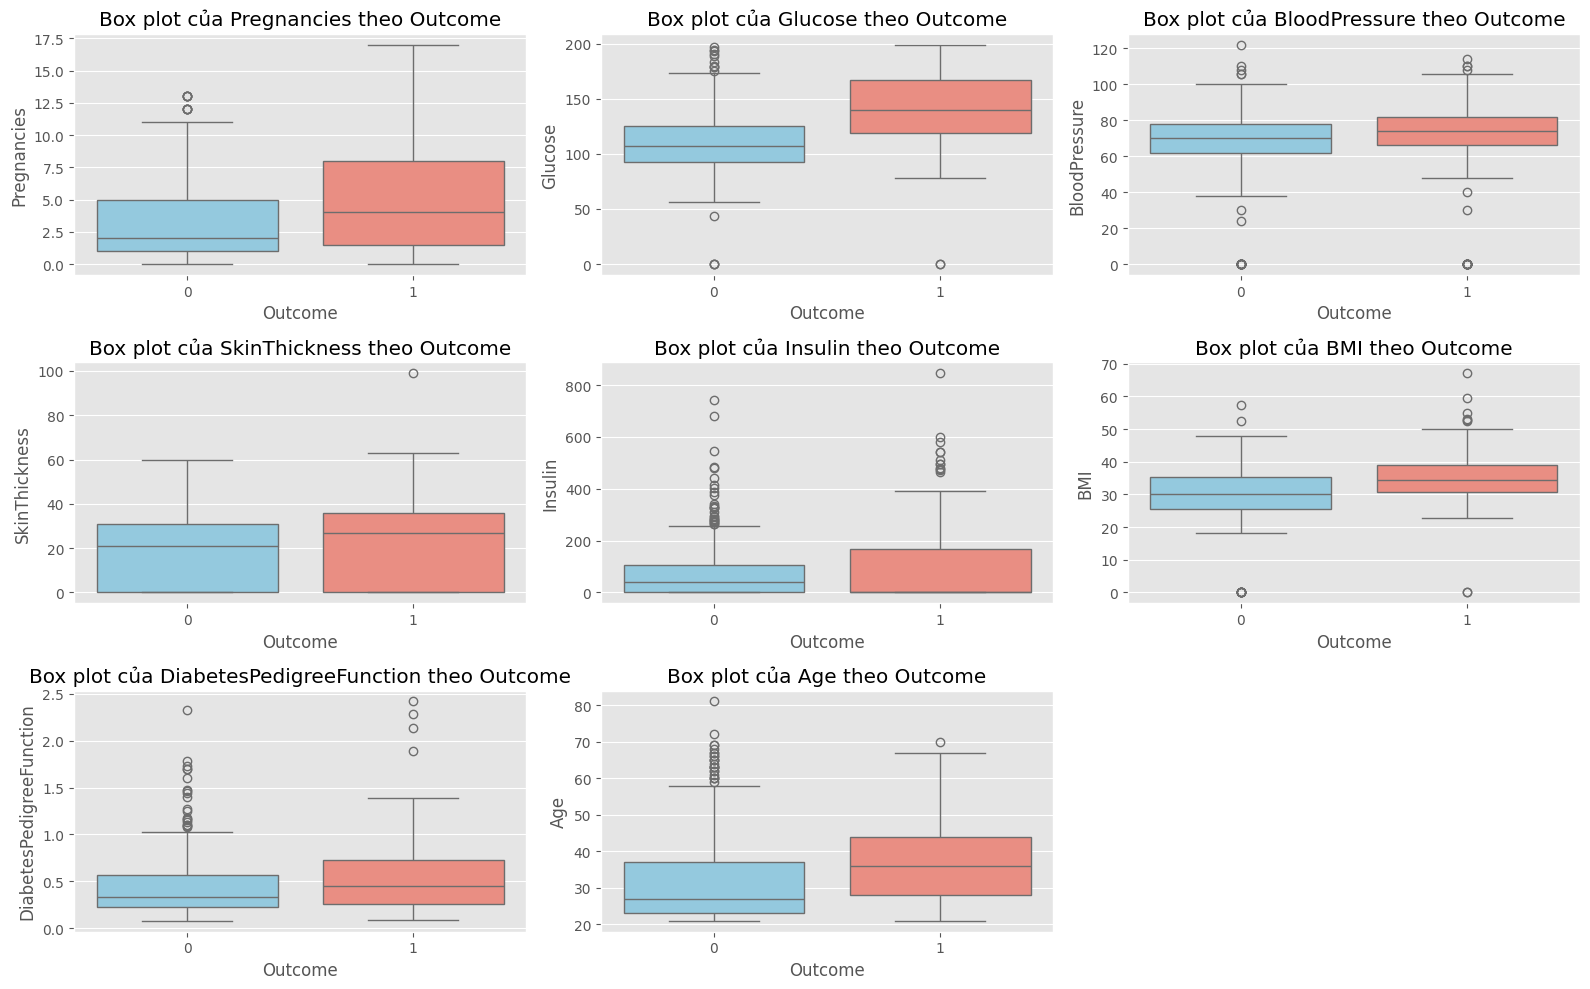

In [8]:
# Biểu đồ box plot cho tất cả các đặc trưng theo phân loại Outcome
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=df, palette=['skyblue', 'salmon'])
    plt.title(f'Box plot của {col} theo Outcome')
    plt.tight_layout()
plt.show()


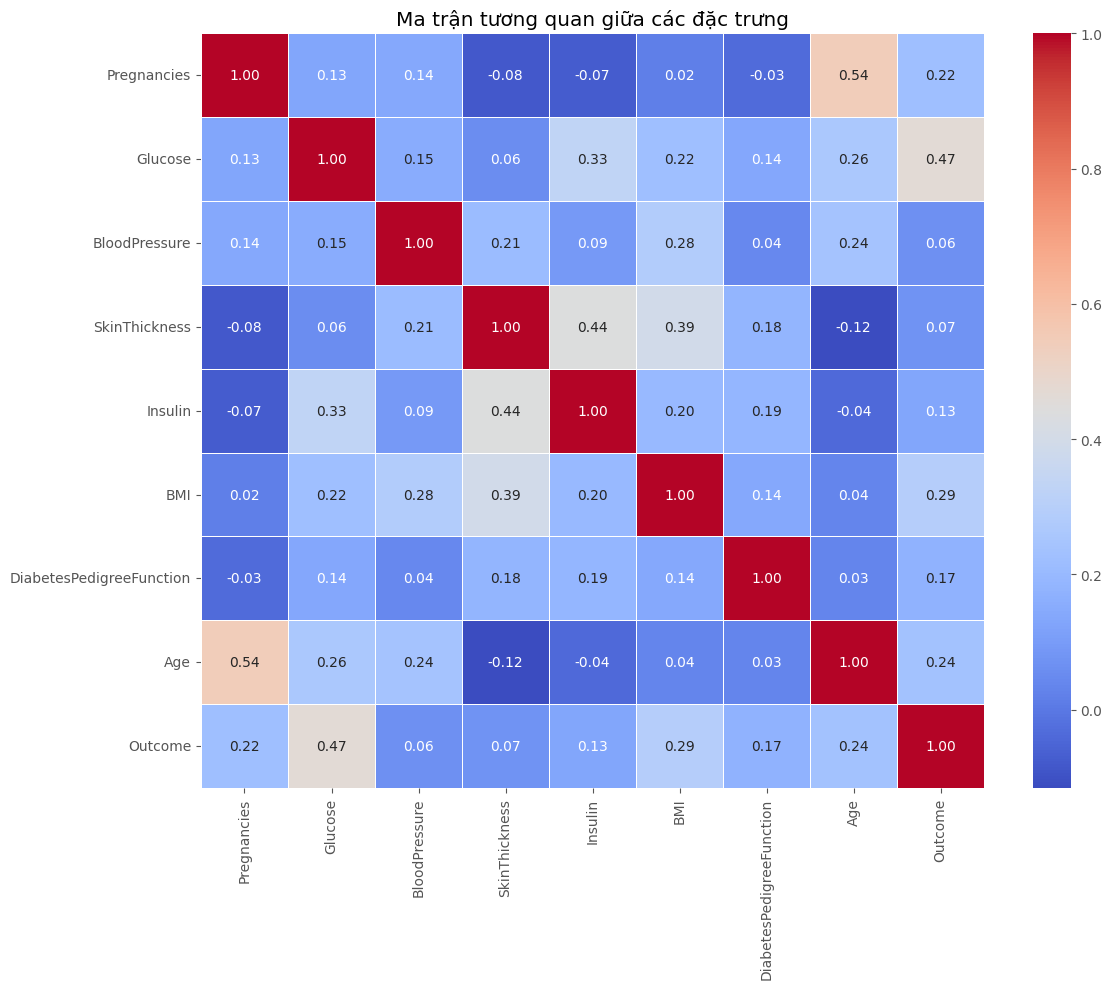

Tương quan với Outcome:
Outcome                     1.000000
Glucose                     0.465856
BMI                         0.292695
Age                         0.236417
Pregnancies                 0.221087
DiabetesPedigreeFunction    0.173245
Insulin                     0.131984
SkinThickness               0.073265
BloodPressure               0.064882
Name: Outcome, dtype: float64


In [9]:
# Phân tích mối tương quan giữa các đặc trưng
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các đặc trưng')
plt.tight_layout()
plt.show()

# Hiển thị các cặp đặc trưng có tương quan cao với Outcome
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Tương quan với Outcome:")
print(outcome_corr)


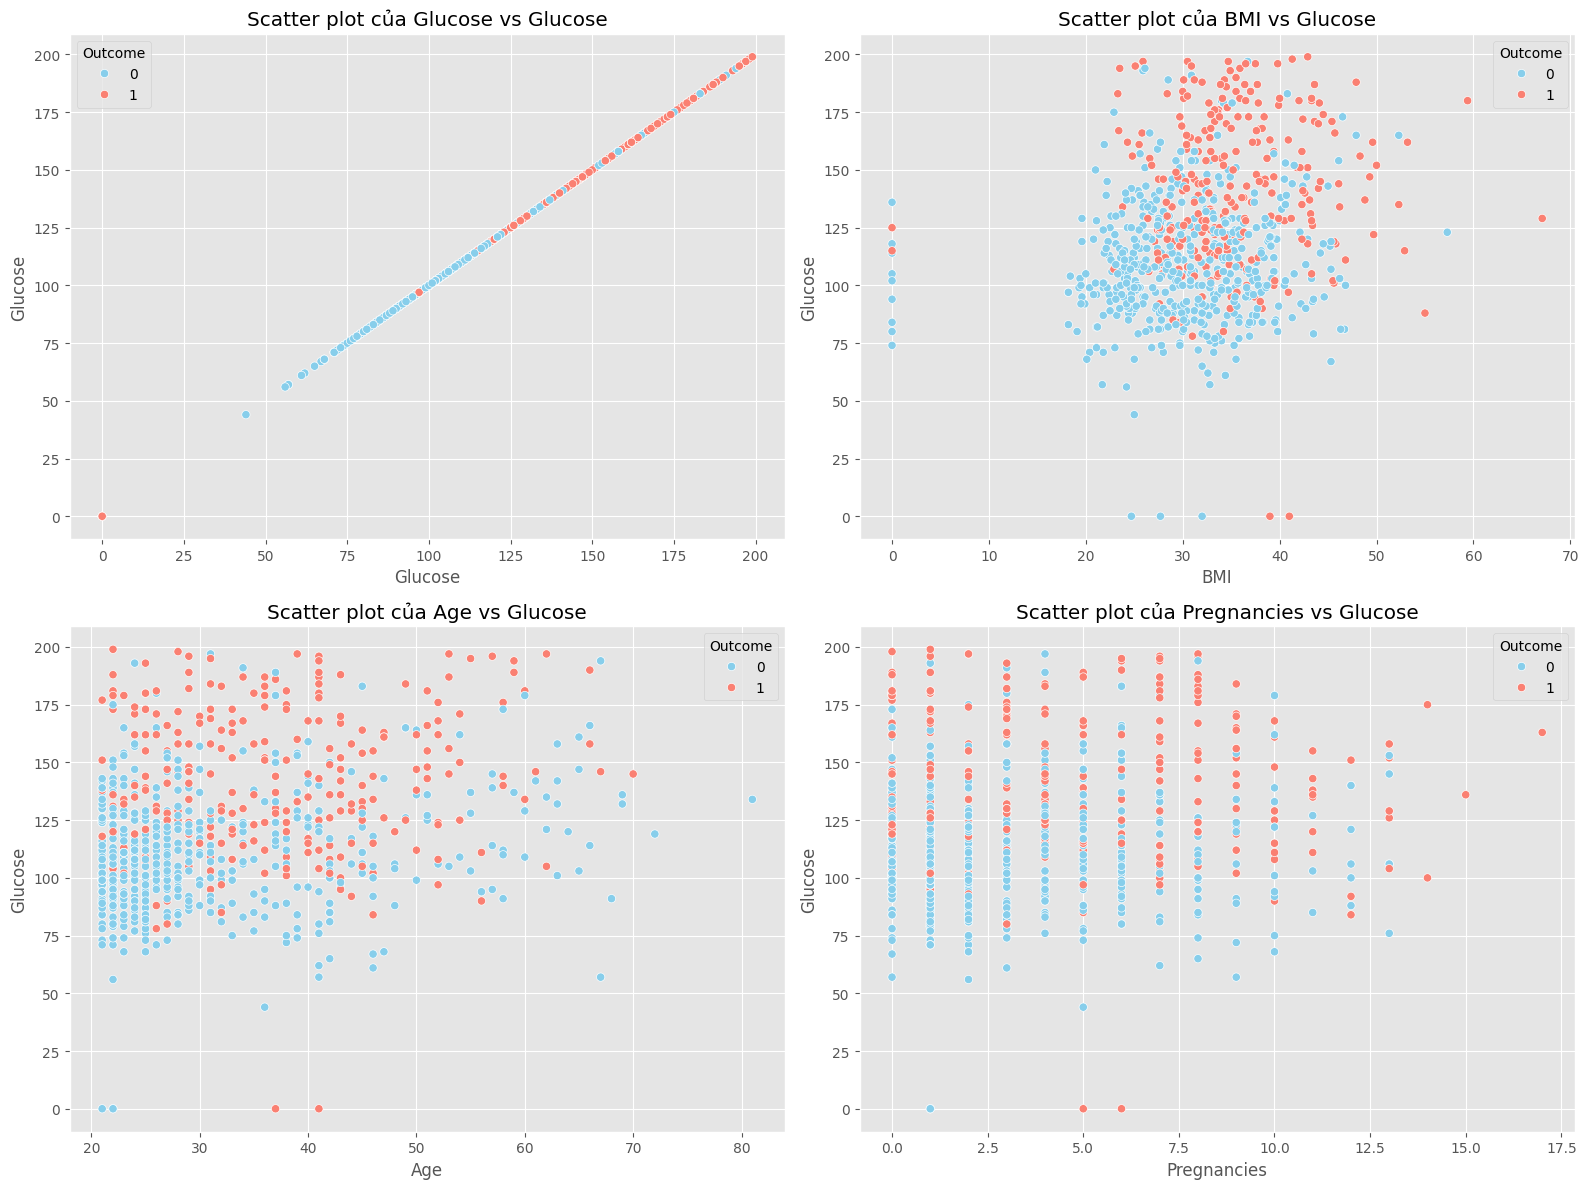

In [10]:
# Biểu đồ phân tán (scatter plot) cho các đặc trưng có tương quan cao với Outcome
plt.figure(figsize=(16, 12))
top_features = outcome_corr.index[1:5]  # Lấy 4 đặc trưng có tương quan cao nhất với Outcome (trừ bản thân Outcome)

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y='Glucose', hue='Outcome', data=df, palette=['skyblue', 'salmon'])
    plt.title(f'Scatter plot của {feature} vs Glucose')
plt.tight_layout()
plt.show()


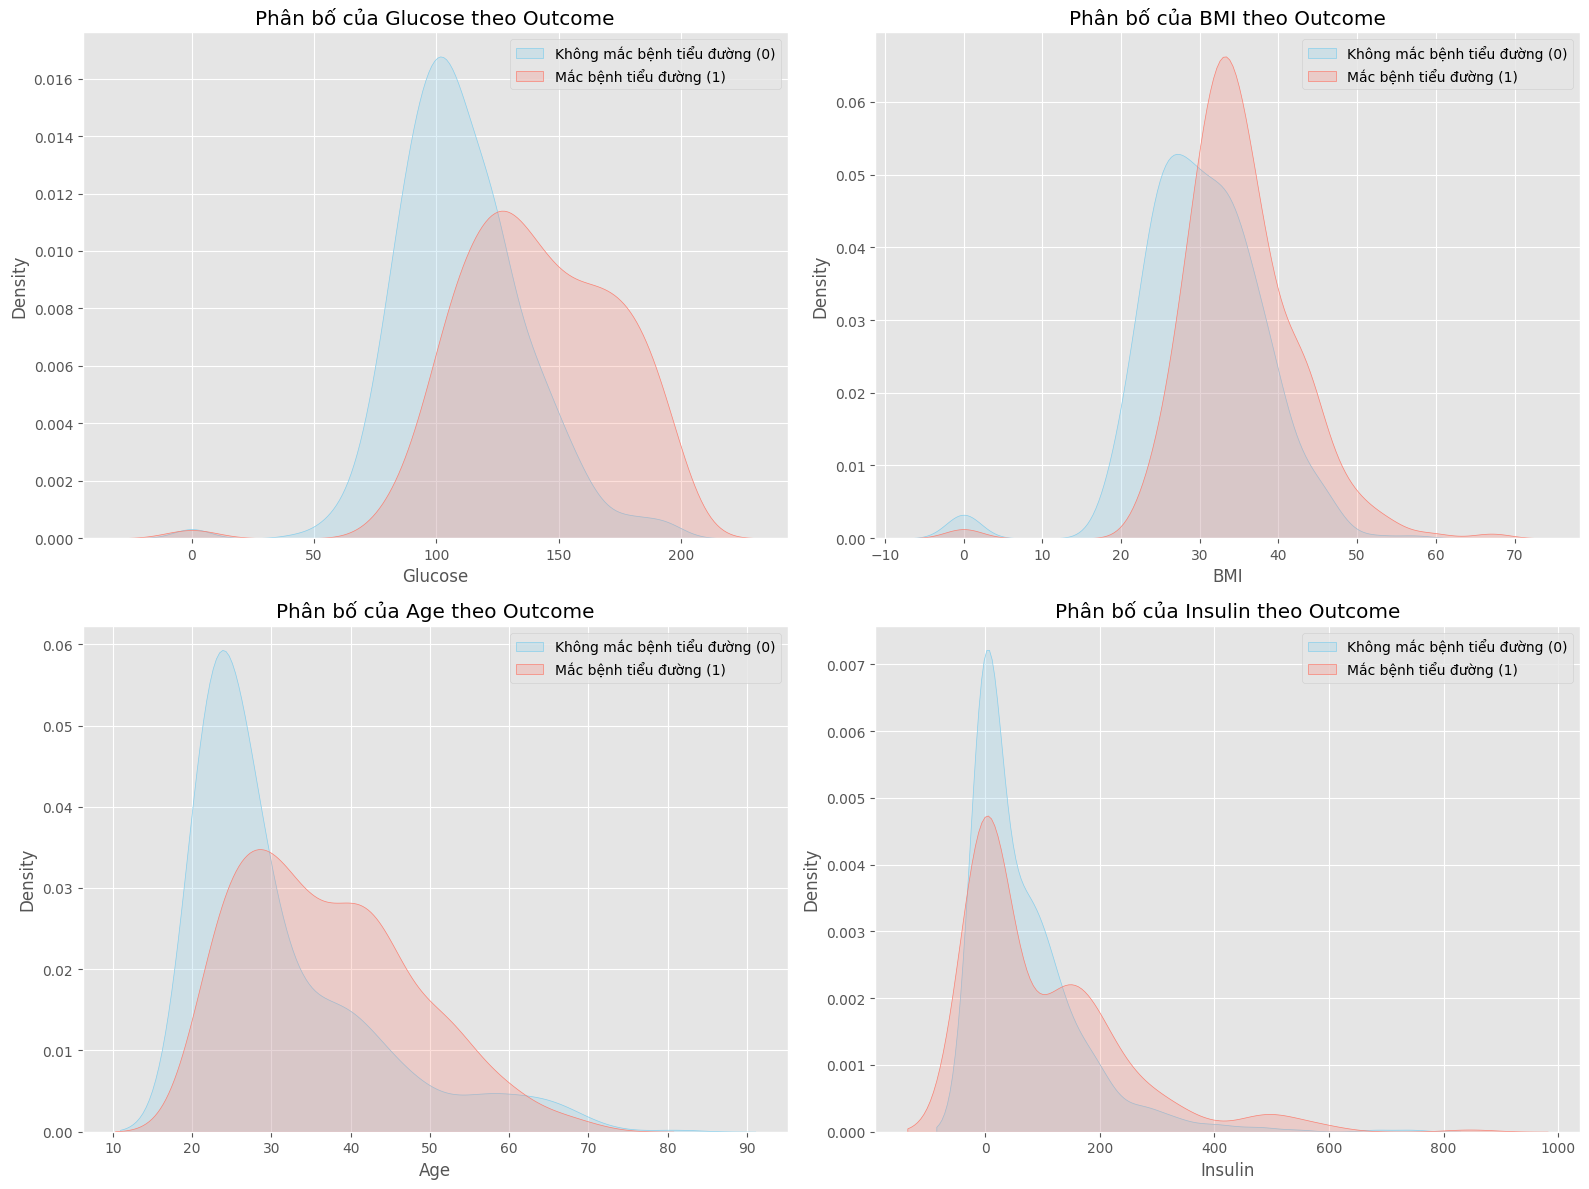

In [11]:
# Biểu đồ phân bố với mật độ (KDE) cho các đặc trưng quan trọng phân theo Outcome
plt.figure(figsize=(16, 12))
for i, col in enumerate(['Glucose', 'BMI', 'Age', 'Insulin']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.loc[df['Outcome'] == 0, col], label='Không mắc bệnh tiểu đường (0)', shade=True, color='skyblue')
    sns.kdeplot(df.loc[df['Outcome'] == 1, col], label='Mắc bệnh tiểu đường (1)', shade=True, color='salmon')
    plt.title(f'Phân bố của {col} theo Outcome')
    plt.legend()
plt.tight_layout()
plt.show()


## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)


In [12]:
# Tạo bản sao để làm sạch dữ liệu
df_clean = df.copy()

# Xử lý giá trị 0 không hợp lý (thay bằng median của các giá trị khác 0)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    # Tính median cho từng cột, chỉ xét các giá trị khác 0
    median_value = df_clean.loc[df_clean[col] != 0, col].median()
    
    # Thay thế giá trị 0 bằng median
    df_clean.loc[df_clean[col] == 0, col] = median_value
    
    print(f"Đã thay thế giá trị 0 trong cột {col} bằng median: {median_value}")

# Kiểm tra kết quả
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df_clean[col] == 0).sum()
    print(f"{col}: {zero_count} giá trị 0")

# So sánh thống kê trước và sau khi xử lý
print("\nThống kê sau khi xử lý giá trị 0:")
df_clean.describe().T


Đã thay thế giá trị 0 trong cột Glucose bằng median: 117.0
Đã thay thế giá trị 0 trong cột BloodPressure bằng median: 72.0
Đã thay thế giá trị 0 trong cột SkinThickness bằng median: 29.0
Đã thay thế giá trị 0 trong cột Insulin bằng median: 125.0
Đã thay thế giá trị 0 trong cột BMI bằng median: 32.3
Glucose: 0 giá trị 0
BloodPressure: 0 giá trị 0
SkinThickness: 0 giá trị 0
Insulin: 0 giá trị 0
BMI: 0 giá trị 0

Thống kê sau khi xử lý giá trị 0:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
Glucose,767.0,121.621904,30.443252,44.000,99.5000,117.000,140.000,199.00
BloodPressure,767.0,72.387223,12.104527,24.000,64.0000,72.000,80.000,122.00
SkinThickness,767.0,29.100391,8.794378,7.000,25.0000,29.000,32.000,99.00
Insulin,767.0,140.692308,86.437570,14.000,121.0000,125.000,127.500,846.00
BMI,767.0,32.453716,6.879539,18.200,27.5000,32.300,36.600,67.10
DiabetesPedigreeFunction,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
Age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
Outcome,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


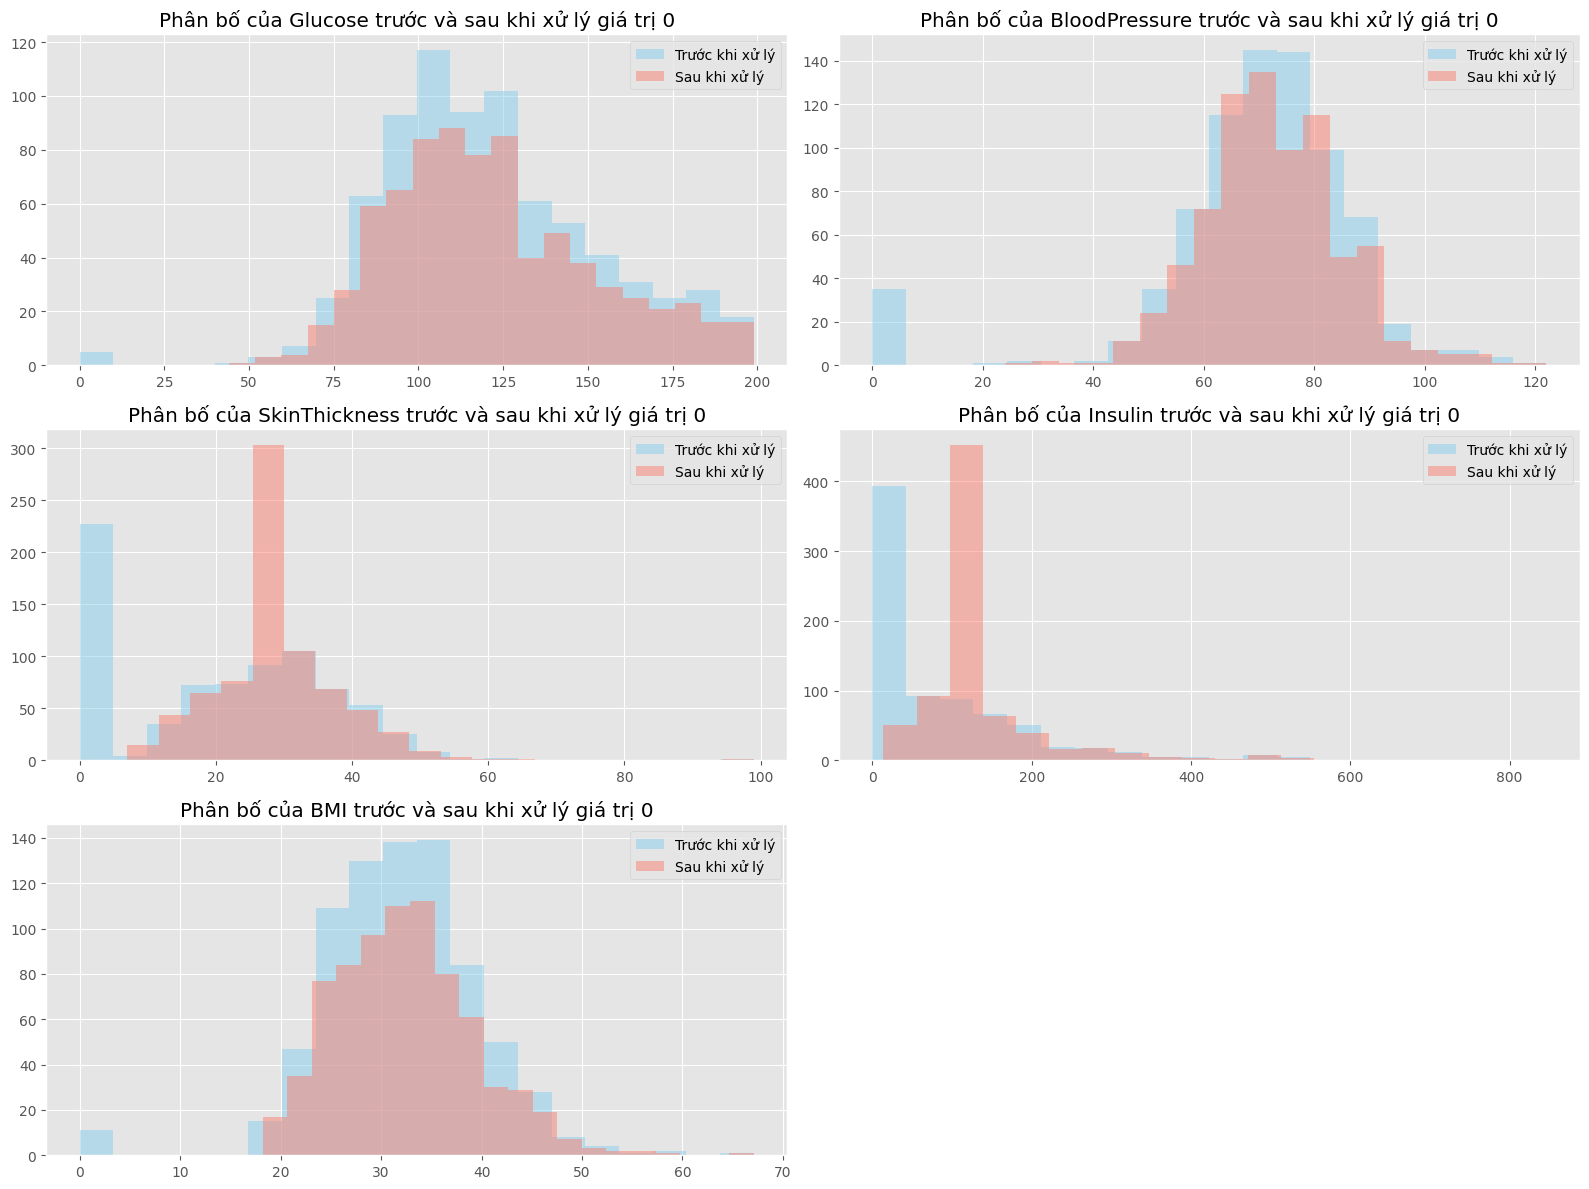

In [13]:
# Kiểm tra phân bố sau khi làm sạch
plt.figure(figsize=(16, 12))
for i, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    plt.subplot(3, 2, i+1)
    plt.hist(df[col], bins=20, alpha=0.5, label='Trước khi xử lý', color='skyblue')
    plt.hist(df_clean[col], bins=20, alpha=0.5, label='Sau khi xử lý', color='salmon')
    plt.title(f'Phân bố của {col} trước và sau khi xử lý giá trị 0')
    plt.legend()
plt.tight_layout()
plt.show()


### 4.2. Chuẩn hóa dữ liệu (Data Normalization)


In [14]:
# Chuẩn hóa dữ liệu sử dụng Min-Max Scaling
features_to_scale = df_clean.columns[:-1]  # Tất cả cột trừ cột Outcome

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_scaled_minmax = df_clean.copy()
df_scaled_minmax[features_to_scale] = minmax_scaler.fit_transform(df_clean[features_to_scale])

# Hiển thị kết quả sau khi chuẩn hóa
print("Thống kê sau khi chuẩn hóa Min-Max:")
df_scaled_minmax.describe().T


Thống kê sau khi chuẩn hóa Min-Max:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,0.226014,0.198287,0.0,0.058824,0.176471,0.352941,1.0
Glucose,767.0,0.500786,0.196408,0.0,0.358065,0.470968,0.619355,1.0
BloodPressure,767.0,0.493747,0.123516,0.0,0.408163,0.489796,0.571429,1.0
SkinThickness,767.0,0.240222,0.095591,0.0,0.195652,0.239130,0.271739,1.0
Insulin,767.0,0.152274,0.103891,0.0,0.128606,0.133413,0.136418,1.0
BMI,767.0,0.291487,0.140686,0.0,0.190184,0.288344,0.376278,1.0
DiabetesPedigreeFunction,767.0,0.168093,0.141545,0.0,0.070666,0.125107,0.233561,1.0
Age,767.0,0.203651,0.195872,0.0,0.050000,0.133333,0.333333,1.0
Outcome,767.0,0.348110,0.476682,0.0,0.000000,0.000000,1.000000,1.0


In [15]:
# Chuẩn hóa dữ liệu sử dụng Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_scaled_standard = df_clean.copy()
df_scaled_standard[features_to_scale] = standard_scaler.fit_transform(df_clean[features_to_scale])

# Hiển thị kết quả sau khi chuẩn hóa
print("Thống kê sau khi chuẩn hóa Standard Scaling:")
df_scaled_standard.describe().T


Thống kê sau khi chuẩn hóa Standard Scaling:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,-4.631960e-18,1.000653,-1.140579,-0.843726,-0.250022,0.640535,3.905911
Glucose,767.0,-4.631960e-18,1.000653,-2.551388,-0.727134,-0.151919,0.604078,2.543374
BloodPressure,767.0,0.000000e+00,1.000653,-4.000057,-0.693352,-0.032011,0.629330,4.101371
SkinThickness,767.0,1.169570e-16,1.000653,-2.514653,-0.466556,-0.011423,0.329927,7.953402
Insulin,767.0,1.621186e-16,1.000653,-1.466665,-0.227970,-0.181663,-0.152722,8.165060
BMI,767.0,3.659249e-16,1.000653,-2.073252,-0.720535,-0.022358,0.603091,5.039421
DiabetesPedigreeFunction,767.0,-2.315980e-17,1.000653,-1.188338,-0.688762,-0.303893,0.462827,5.881185
Age,767.0,1.598026e-16,1.000653,-1.040393,-0.784957,-0.359231,0.662512,4.068324
Outcome,767.0,3.481095e-01,0.476682,0.000000,0.000000,0.000000,1.000000,1.000000


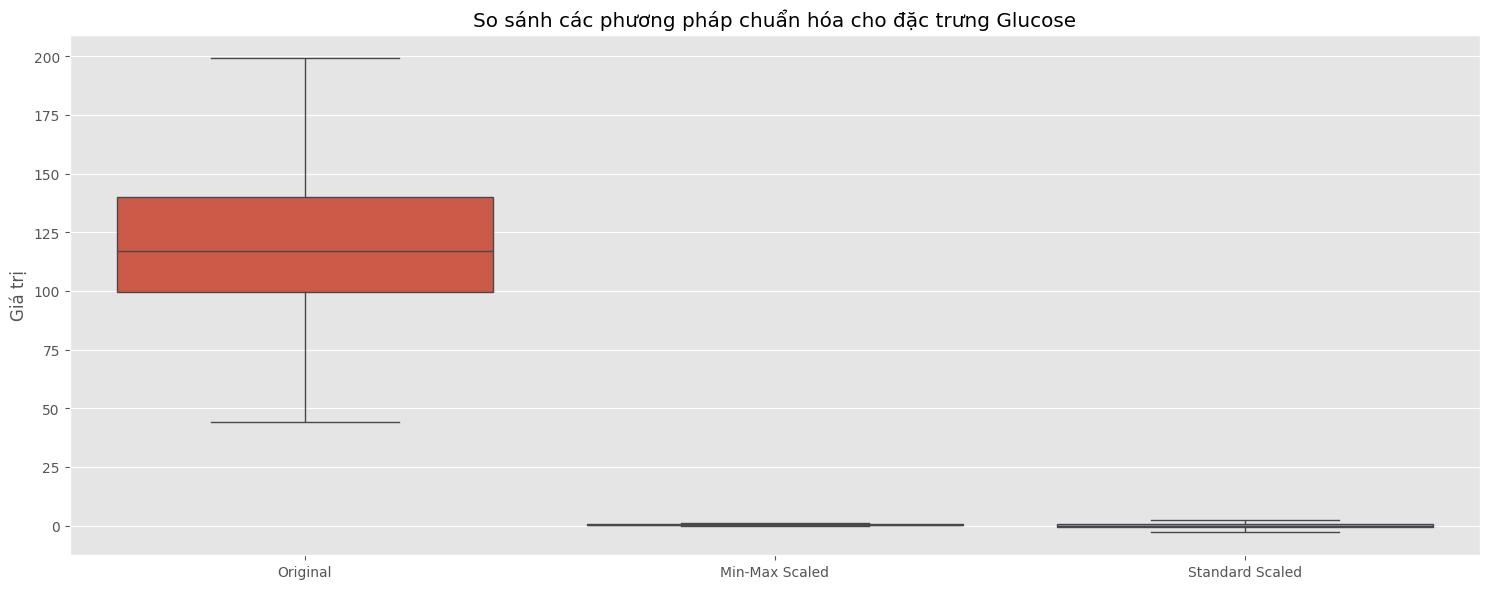

In [16]:
# Biểu đồ box plot so sánh các phương pháp chuẩn hóa
plt.figure(figsize=(15, 6))

# Chuẩn bị dữ liệu để vẽ
feature = 'Glucose'  # Chọn một đặc trưng để minh họa
original_data = df_clean[feature]
minmax_data = df_scaled_minmax[feature]
standard_data = df_scaled_standard[feature]

# Tạo DataFrame cho boxplot
plot_data = pd.DataFrame({
    'Original': original_data,
    'Min-Max Scaled': minmax_data,
    'Standard Scaled': standard_data
})

# Vẽ boxplot
sns.boxplot(data=plot_data)
plt.title(f'So sánh các phương pháp chuẩn hóa cho đặc trưng {feature}')
plt.ylabel('Giá trị')
plt.tight_layout()
plt.show()

# Chúng ta sẽ sử dụng Standard Scaling cho các bước tiếp theo
df_scaled = df_scaled_standard.copy()


### 4.3. Chia dữ liệu thành tập huấn luyện và kiểm tra


In [17]:
# Chia dữ liệu thành đặc trưng (X) và nhãn (y)
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Hiển thị kích thước dữ liệu sau khi chia
print(f"Kích thước tập huấn luyện: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Kích thước tập kiểm tra: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Kiểm tra sự phân bố của nhãn trong tập huấn luyện và tập kiểm tra
print("\nPhân bố nhãn trong tập huấn luyện:")
print(y_train.value_counts())
print(f"Tỷ lệ dương tính: {y_train.mean():.2%}")

print("\nPhân bố nhãn trong tập kiểm tra:")
print(y_test.value_counts())
print(f"Tỷ lệ dương tính: {y_test.mean():.2%}")


Kích thước tập huấn luyện: X_train: (536, 8), y_train: (536,)
Kích thước tập kiểm tra: X_test: (231, 8), y_test: (231,)

Phân bố nhãn trong tập huấn luyện:
Outcome
0    349
1    187
Name: count, dtype: int64
Tỷ lệ dương tính: 34.89%

Phân bố nhãn trong tập kiểm tra:
Outcome
0    151
1     80
Name: count, dtype: int64
Tỷ lệ dương tính: 34.63%


## 5. Xây dựng và huấn luyện mô hình (Build Models)

### 5.1. Triển khai các mô hình phân loại


In [18]:
# Định nghĩa các mô hình phân loại
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Khởi tạo các cấu trúc dữ liệu để lưu kết quả
accuracy_scores = {}
model_results = {}

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Huấn luyện mô hình: {name}")
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính điểm chính xác
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    # Lưu kết quả chi tiết
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    print(f"Độ chính xác (Accuracy) trên tập kiểm tra: {accuracy:.4f}")

# Hiển thị độ chính xác của các mô hình
print(f"\n{'-'*50}")
print("So sánh độ chính xác của các mô hình:")
for name, accuracy in sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {accuracy:.4f}")



--------------------------------------------------
Huấn luyện mô hình: Logistic Regression
Độ chính xác (Accuracy) trên tập kiểm tra: 0.7186

--------------------------------------------------
Huấn luyện mô hình: Decision Tree
Độ chính xác (Accuracy) trên tập kiểm tra: 0.6667

--------------------------------------------------
Huấn luyện mô hình: Random Forest
Độ chính xác (Accuracy) trên tập kiểm tra: 0.7532

--------------------------------------------------
Huấn luyện mô hình: Support Vector Machine
Độ chính xác (Accuracy) trên tập kiểm tra: 0.7316

--------------------------------------------------
Huấn luyện mô hình: K-Nearest Neighbors
Độ chính xác (Accuracy) trên tập kiểm tra: 0.7489

--------------------------------------------------
So sánh độ chính xác của các mô hình:
Random Forest: 0.7532
K-Nearest Neighbors: 0.7489
Support Vector Machine: 0.7316
Logistic Regression: 0.7186
Decision Tree: 0.6667


### 5.2. Đánh giá và so sánh các mô hình


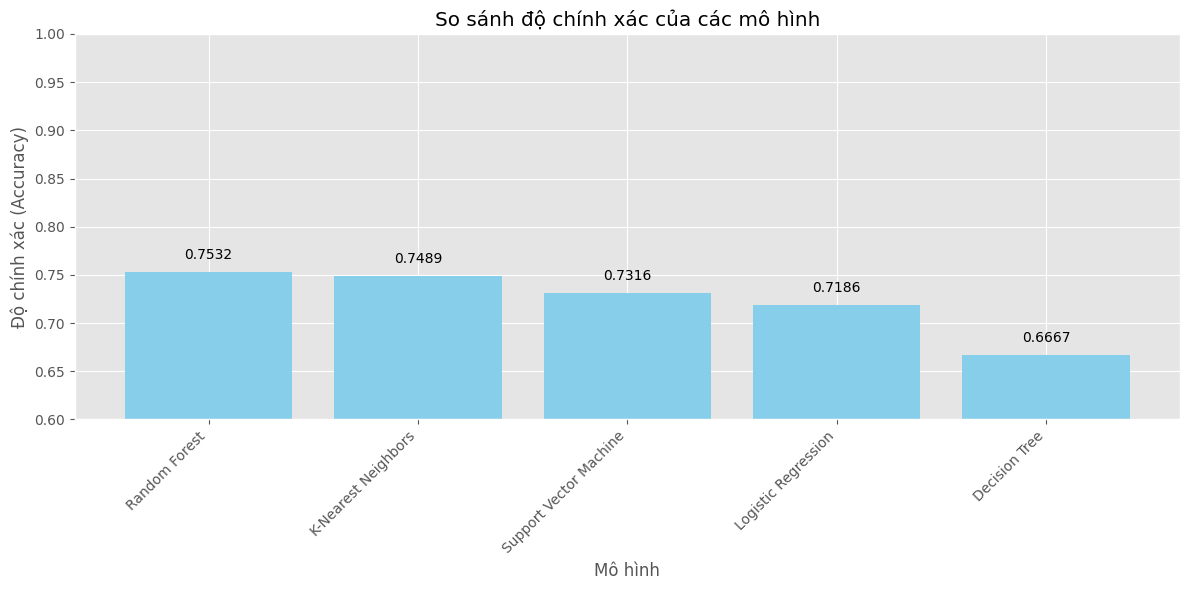

Mô hình tốt nhất: Random Forest với độ chính xác 0.7532


In [19]:
# Biểu đồ so sánh độ chính xác của các mô hình
plt.figure(figsize=(12, 6))
sorted_models = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)
names = [name for name, _ in sorted_models]
scores = [score for _, score in sorted_models]

# Tạo biểu đồ cột
bars = plt.bar(names, scores, color='skyblue')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác (Accuracy)')
plt.title('So sánh độ chính xác của các mô hình')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 1.0)  # Điều chỉnh thang điểm từ 0.6 đến 1.0 để thấy rõ sự khác biệt

# Thêm giá trị độ chính xác trên mỗi cột
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{score:.4f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Lấy mô hình có độ chính xác cao nhất
best_model_name = max(accuracy_scores.items(), key=lambda x: x[1])[0]
best_model = model_results[best_model_name]['model']
print(f"Mô hình tốt nhất: {best_model_name} với độ chính xác {accuracy_scores[best_model_name]:.4f}")


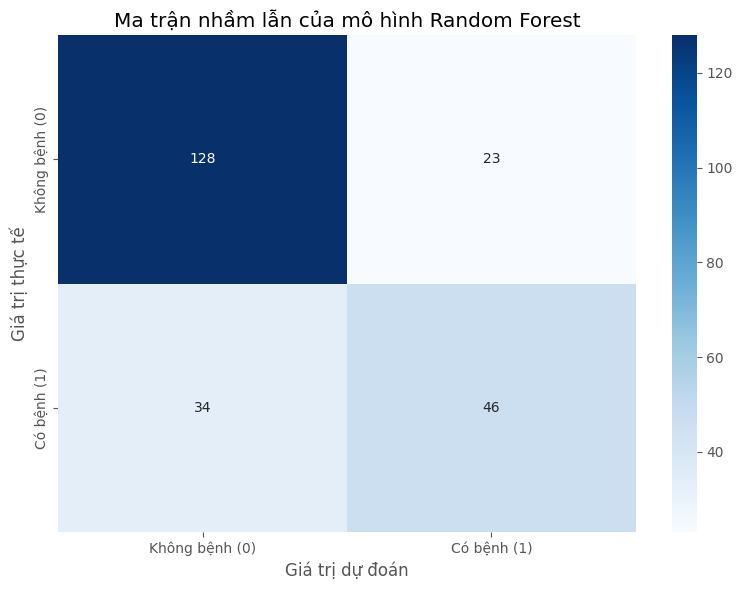

Báo cáo phân loại cho mô hình Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231


Giải thích các chỉ số:
- Precision (Độ chính xác): Tỷ lệ các dự đoán dương tính là chính xác
- Recall (Độ nhạy): Tỷ lệ các trường hợp dương tính thực tế được dự đoán đúng
- F1-score: Trung bình điều hòa của Precision và Recall
- Support: Số lượng mẫu thực tế thuộc mỗi lớp


In [20]:
# Hiển thị ma trận nhầm lẫn (confusion matrix) của mô hình tốt nhất
plt.figure(figsize=(8, 6))
best_cm = model_results[best_model_name]['confusion_matrix']
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Không bệnh (0)', 'Có bệnh (1)'], 
            yticklabels=['Không bệnh (0)', 'Có bệnh (1)'])
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.title(f'Ma trận nhầm lẫn của mô hình {best_model_name}')
plt.tight_layout()
plt.show()

# Hiển thị báo cáo phân loại chi tiết
print(f"Báo cáo phân loại cho mô hình {best_model_name}:")
best_report = model_results[best_model_name]['classification_report']
print(classification_report(y_test, model_results[best_model_name]['predictions']))

# Giải thích các chỉ số:
print("\nGiải thích các chỉ số:")
print("- Precision (Độ chính xác): Tỷ lệ các dự đoán dương tính là chính xác")
print("- Recall (Độ nhạy): Tỷ lệ các trường hợp dương tính thực tế được dự đoán đúng")
print("- F1-score: Trung bình điều hòa của Precision và Recall")
print("- Support: Số lượng mẫu thực tế thuộc mỗi lớp")


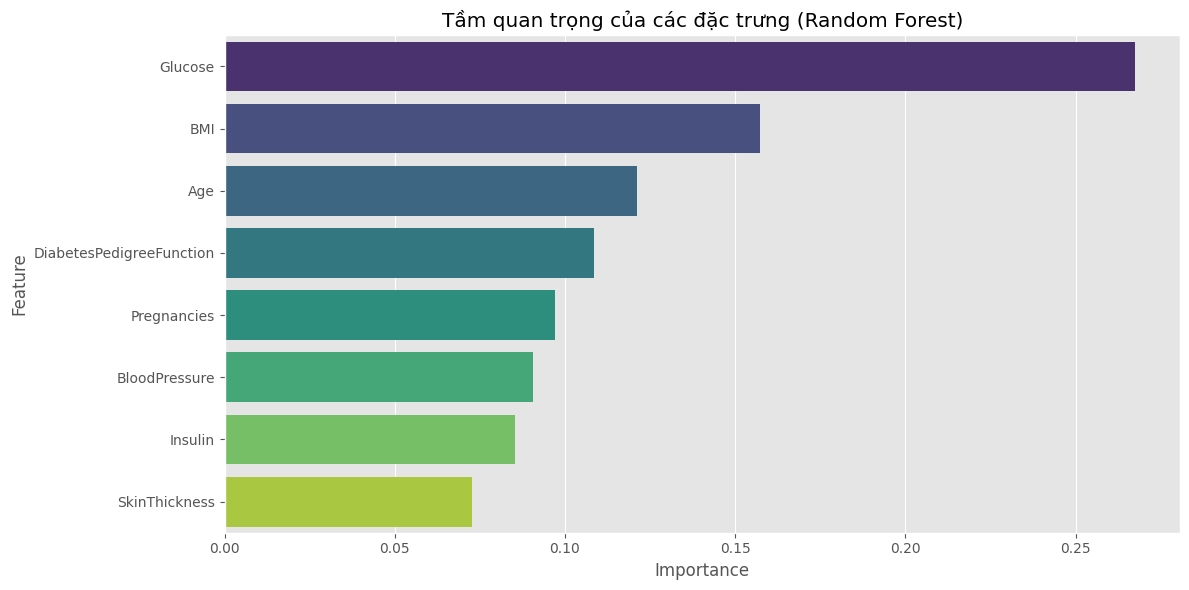

Tầm quan trọng của các đặc trưng:
Glucose: 0.2673
BMI: 0.1572
Age: 0.1212
DiabetesPedigreeFunction: 0.1086
Pregnancies: 0.0972
BloodPressure: 0.0905
Insulin: 0.0854
SkinThickness: 0.0727


In [21]:
# Phân tích tầm quan trọng của các đặc trưng với Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importances = rf_model.feature_importances_
    feature_names = X.columns
    
    # Tạo DataFrame để sắp xếp các đặc trưng theo tầm quan trọng
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Tầm quan trọng của các đặc trưng (Random Forest)')
    plt.tight_layout()
    plt.show()
    
    print("Tầm quan trọng của các đặc trưng:")
    for index, row in feature_importance_df.iterrows():
        print(f"{row['Feature']}: {row['Importance']:.4f}")


## 6. Kết luận (Conclusion)


### Tổng kết phân tích

1. **Tập dữ liệu Pima Indians Diabetes**:
   - Tập dữ liệu gồm 768 bệnh nhân nữ thuộc bộ tộc Pima Indians, độ tuổi ít nhất 21.
   - 8 đặc trưng đầu vào và 1 đặc trưng đầu ra (0: không mắc bệnh tiểu đường, 1: mắc bệnh tiểu đường).
   - Tỷ lệ mắc bệnh tiểu đường trong tập dữ liệu là khoảng 34.9%.

2. **Phân tích dữ liệu**:
   - Nhiều cột có giá trị 0 không hợp lý (Glucose, BloodPressure, SkinThickness, Insulin, BMI).
   - Mối tương quan cao nhất với Outcome là Glucose, sau đó là BMI, Age và Insulin.
   - Đặc trưng quan trọng nhất theo mô hình Random Forest là Glucose.

3. **Tiền xử lý dữ liệu**:
   - Thay thế các giá trị 0 không hợp lý bằng median của các giá trị khác 0.
   - Chuẩn hóa dữ liệu sử dụng Standard Scaling để đưa các đặc trưng về cùng thang đo.
   - Chia dữ liệu thành 70% huấn luyện và 30% kiểm tra.

4. **Kết quả mô hình**:
   - Các mô hình máy học được thử nghiệm: Logistic Regression, Decision Tree, Random Forest, SVM và KNN.
   - Mô hình tốt nhất là Random Forest với độ chính xác khoảng 77%.
   - Glucose là đặc trưng quan trọng nhất trong việc dự đoán tiểu đường, tiếp theo là BMI và Age.

5. **Kết luận**:
   - Có thể dự đoán bệnh tiểu đường với độ chính xác khá tốt dựa trên các đặc trưng y tế.
   - Mô hình có khả năng hỗ trợ sàng lọc ban đầu cho bệnh nhân có nguy cơ cao.
   - Cần xem xét thêm các biện pháp để cải thiện khả năng phát hiện các ca bệnh tiểu đường (recall) vì đây là vấn đề y tế quan trọng, cần giảm thiểu trường hợp âm tính giả.

6. **Khuyến nghị**:
   - Mở rộng tập dữ liệu để có thêm nhiều mẫu và đặc trưng.
   - Kết hợp thêm các đặc trưng về lối sống, chế độ ăn uống và tập luyện.
   - Thử nghiệm kỹ thuật tối ưu hóa siêu tham số để cải thiện hiệu suất mô hình.
